## Initial Setting
* Importing packages and dataset

In [2]:
# Standard
import sys
sys.path.append("..")

import importlib
import modules.preprocessing

importlib.reload(modules.preprocessing)

from modules.preprocessing import load_and_clean_data
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy.stats import chi2_contingency

# Preprocessing
from sklearn.preprocessing import LabelEncoder

# load and clean data
path_raw = os.path.join('..', 'data', 'survey_lung_cancer.csv')
df_cleaned = load_and_clean_data(path_raw)

---

## Basic Info
- 276 rows x 16 columns after cleaning
- Missing Values Check - **No missing values 🎉**

In [3]:
df_cleaned.head()

,GENDER,AGE,SMOKING,YELLOW FINGERS,ANXIETY,PEER PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [4]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   GENDER                 276 non-null    category
 1   AGE                    276 non-null    int64   
 2   SMOKING                276 non-null    int64   
 3   YELLOW FINGERS         276 non-null    int64   
 4   ANXIETY                276 non-null    int64   
 5   PEER PRESSURE          276 non-null    int64   
 6   CHRONIC DISEASE        276 non-null    int64   
 7   FATIGUE                276 non-null    int64   
 8   ALLERGY                276 non-null    int64   
 9   WHEEZING               276 non-null    int64   
 10  ALCOHOL CONSUMING      276 non-null    int64   
 11  COUGHING               276 non-null    int64   
 12  SHORTNESS OF BREATH    276 non-null    int64   
 13  SWALLOWING DIFFICULTY  276 non-null    int64   
 14  CHEST PAIN             276 non-null    int64   

In [5]:
df_cleaned.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW FINGERS           0
ANXIETY                  0
PEER PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG CANCER              0
dtype: int64

---

## Lung Cancer Distribution
- **86.23%** of individuals in the dataset were diagnosed with lung cancer.

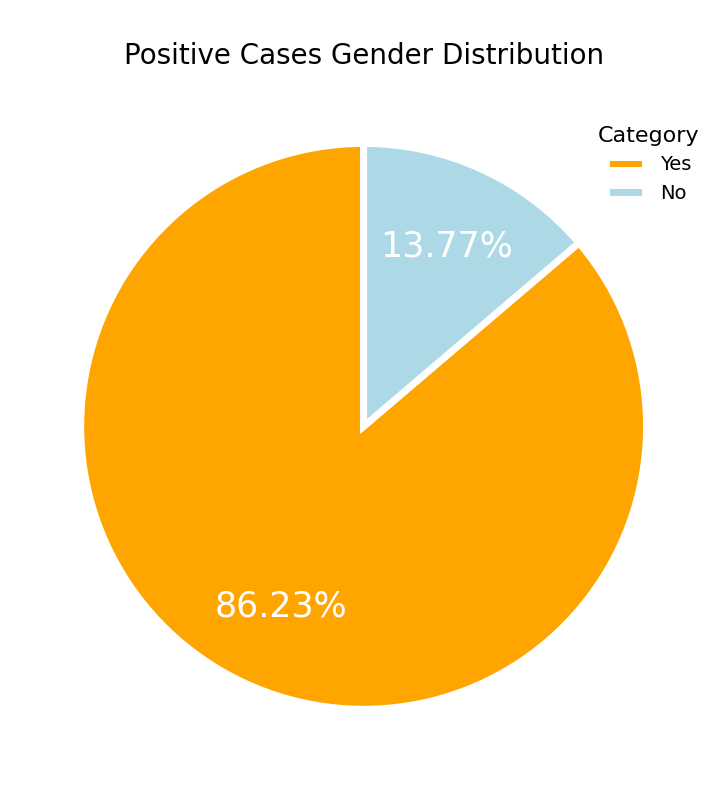

In [7]:
plt.subplots(figsize=(9, 8))

lung_cancer_counts = df_cleaned['LUNG CANCER'].map({0: 'No', 1: 'Yes'}).value_counts()

labels = lung_cancer_counts.index
sizes = lung_cancer_counts.values

wedges, texts, autotexts = plt.pie(sizes,
                                   textprops=dict(size=25, color='white'),
                                   autopct='%.2f%%', 
                                   pctdistance=0.7,
                                   colors=['orange','lightblue'], 
                                   wedgeprops=dict(width=1.0, edgecolor='white', linewidth=5),
                                   startangle=90)

plt.legend(wedges, 
           labels, 
           title='Category',
           title_fontsize=16,
           fontsize=14,
           loc='upper right',
           bbox_to_anchor=(1, 0.95),
           frameon=False)
plt.title('\nPositive Cases Gender Distribution', fontsize=20)
plt.tight_layout()
plt.show()

---

## Ages Distribution
- Both genders peak around the **60s**
- Females show more age spread, males are more tightly clustered
- Useful for tuning age-sensitive models or targeting risk messaging

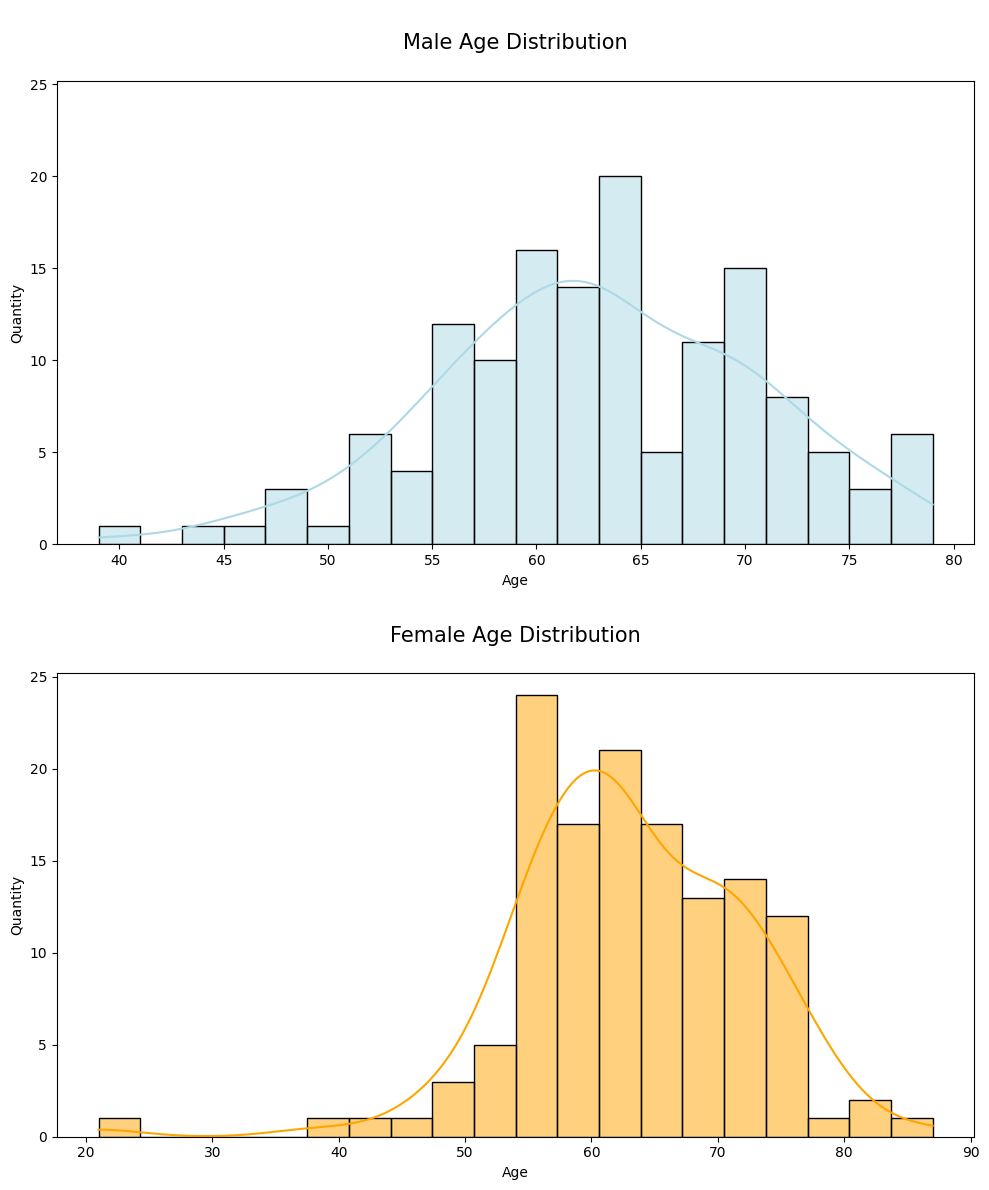

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(10, 12), sharey=True)

sns.histplot(df_cleaned[df_cleaned['GENDER'] == 'M']['AGE'],  
             color='lightblue', 
             kde=True, 
             ax=ax[0], 
             bins=20, 
             fill=True)
ax[0].set_title('\nMale Age Distribution\n', fontsize=15)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Quantity')

sns.histplot(df_cleaned[df_cleaned['GENDER'] == 'F']['AGE'],  
             color='orange', 
             kde=True, 
             ax=ax[1], 
             bins=20, 
             fill=True)
ax[1].set_title('\nFemale Age Distribution\n', fontsize=15)
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Quantity')

plt.tight_layout()
plt.show()

- Both genders peak around ages **60–65**, indicating this is a high-risk range
- Males show a tighter concentration in the **55–70 range** for both total and positive cases
- Females have a **broader age** spread, including more cases over age **70**—even among positive cases
- The positive case distribution mirrors the overall shape but emphasizes the 60s age band for both genders

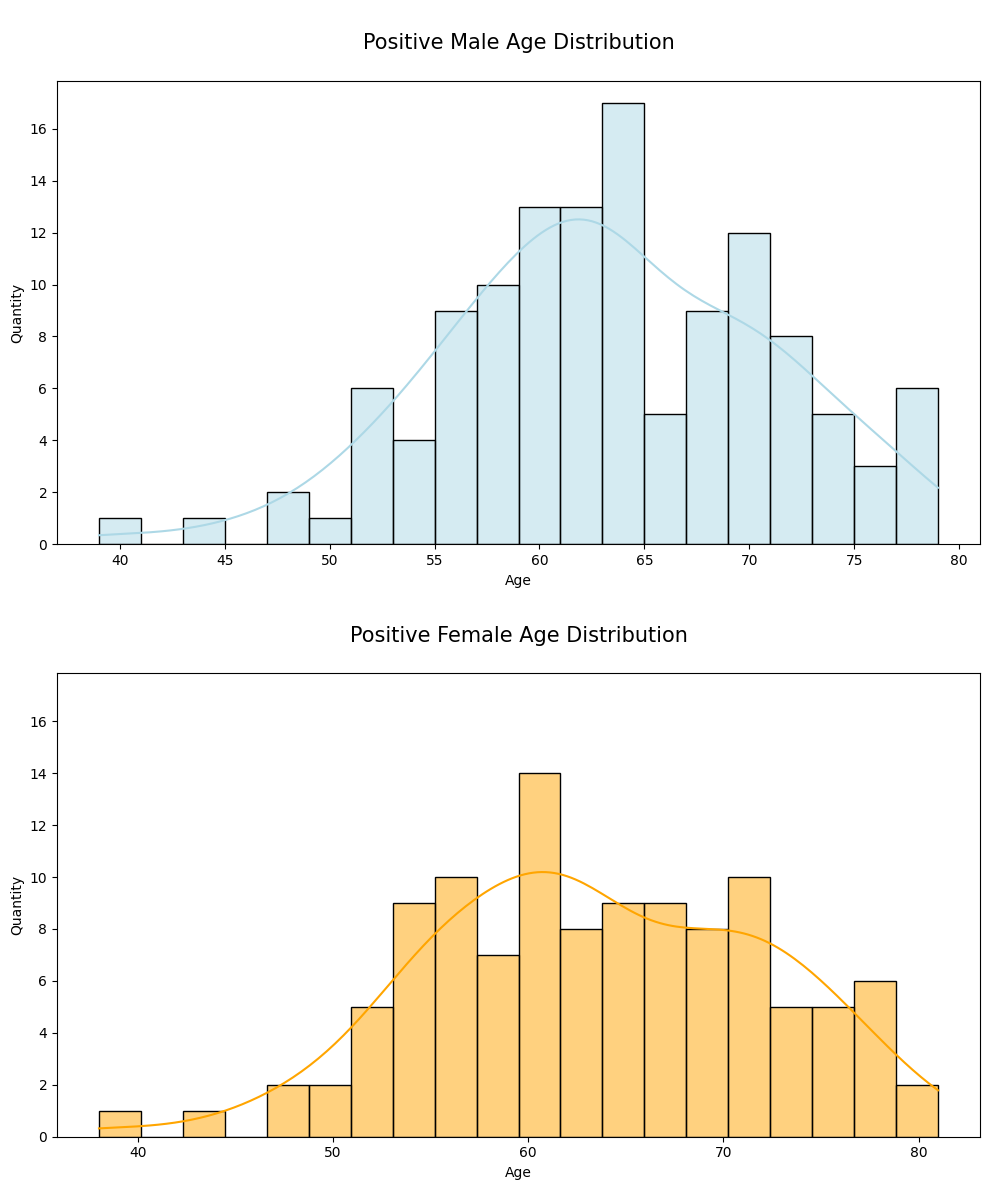

In [23]:
fig, ax = plt.subplots(2, 1, figsize=(10, 12), sharey=True)

sns.histplot(df_cleaned[(df_cleaned['GENDER'] == 'M') & (df_cleaned['LUNG CANCER'] == 1)]['AGE'],  
             color='lightblue', 
             kde=True, 
             ax=ax[0], 
             bins=20, 
             fill=True)
ax[0].set_title('\nPositive Male Age Distribution\n', fontsize=15)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Quantity')

sns.histplot(df_cleaned[(df_cleaned['GENDER'] == 'F') & (df_cleaned['LUNG CANCER'] == 1)]['AGE'],  
             color='orange', 
             kde=True, 
             ax=ax[1], 
             bins=20, 
             fill=True)
ax[1].set_title('\nPositive Female Age Distribution\n', fontsize=15)
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Quantity')

plt.tight_layout()
plt.show()

---

## Gender Distribution
- Gender distribution is nearly **balanced**, with males accounting for 51.45% and females for 48.55%

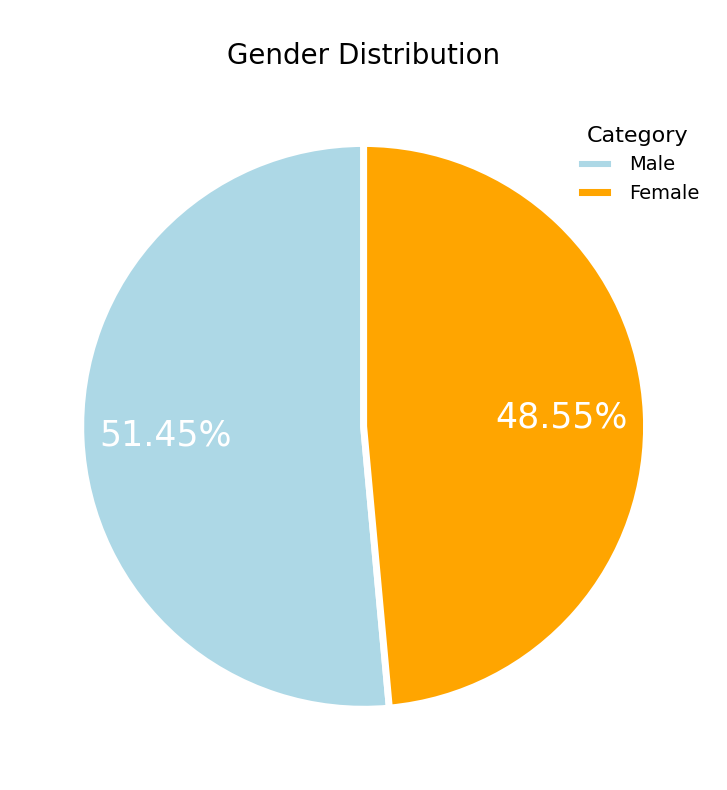

In [26]:
plt.subplots(figsize=(9, 8))

gender_counts = df_cleaned['GENDER'].map({'M': 'Male', 'F': 'Female'}).value_counts()

labels = gender_counts.index
sizes = gender_counts.values

wedges, texts, autotexts = plt.pie(sizes,
                                   textprops=dict(size=25, color='white'),
                                   autopct='%.2f%%', 
                                   pctdistance=0.7,
                                   colors=['lightblue','orange'], 
                                   wedgeprops=dict(width=1.0, edgecolor='white', linewidth=5),
                                   startangle=90)

plt.legend(wedges, 
           labels, 
           title='Category',
           title_fontsize=16,
           fontsize=14,
           loc='upper right',
           bbox_to_anchor=(1, 0.95),
           frameon=False)
plt.title('\nGender Distribution', fontsize=20)
plt.tight_layout()
plt.show()

- Lung cancer positive cases are fairly evenly split between males (52.52%) and females (47.48%)

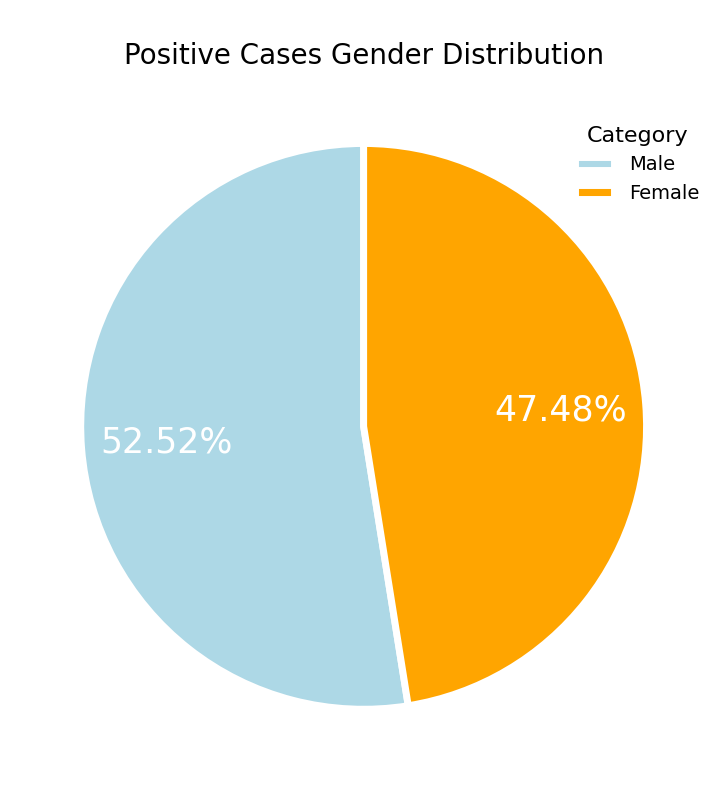

In [28]:
plt.subplots(figsize=(9, 8))

gender_counts = df_cleaned['GENDER'][df_cleaned['LUNG CANCER'] == 1].map({'M': 'Male', 'F': 'Female'}).value_counts()

labels = gender_counts.index
sizes = gender_counts.values

wedges, texts, autotexts = plt.pie(sizes,
                                   textprops=dict(size=25, color='white'),
                                   autopct='%.2f%%', 
                                   pctdistance=0.7,
                                   colors=['lightblue','orange'], 
                                   wedgeprops=dict(width=1.0, edgecolor='white', linewidth=5),
                                   startangle=90)

plt.legend(wedges, 
           labels, 
           title='Category',
           title_fontsize=16,
           fontsize=14,
           loc='upper right',
           bbox_to_anchor=(1, 0.95),
           frameon=False)
plt.title('\nPositive Cases Gender Distribution', fontsize=20)
plt.tight_layout()
plt.show()

---

## Behavioral and Symptoms Columns
> Each chart shows the **lung cancer rate (%)** for binary features (Yes vs. No).  
> Orange = "Yes" group, Light Blue = "No" group.  
> Y-axis: % of lung cancer cases · X-axis: Feature value
- **Respiratory symptoms** (wheezing, coughing, chest pain) are the strongest indicators
- **Smoking-related signs** (e.g., yellow fingers, peer pressure) show elevated risk
- **Comorbidities and lifestyle factors** (chronic disease, anxiety, alcohol use) also contribute
> **Symptoms are more predictive** than behaviors in this dataset

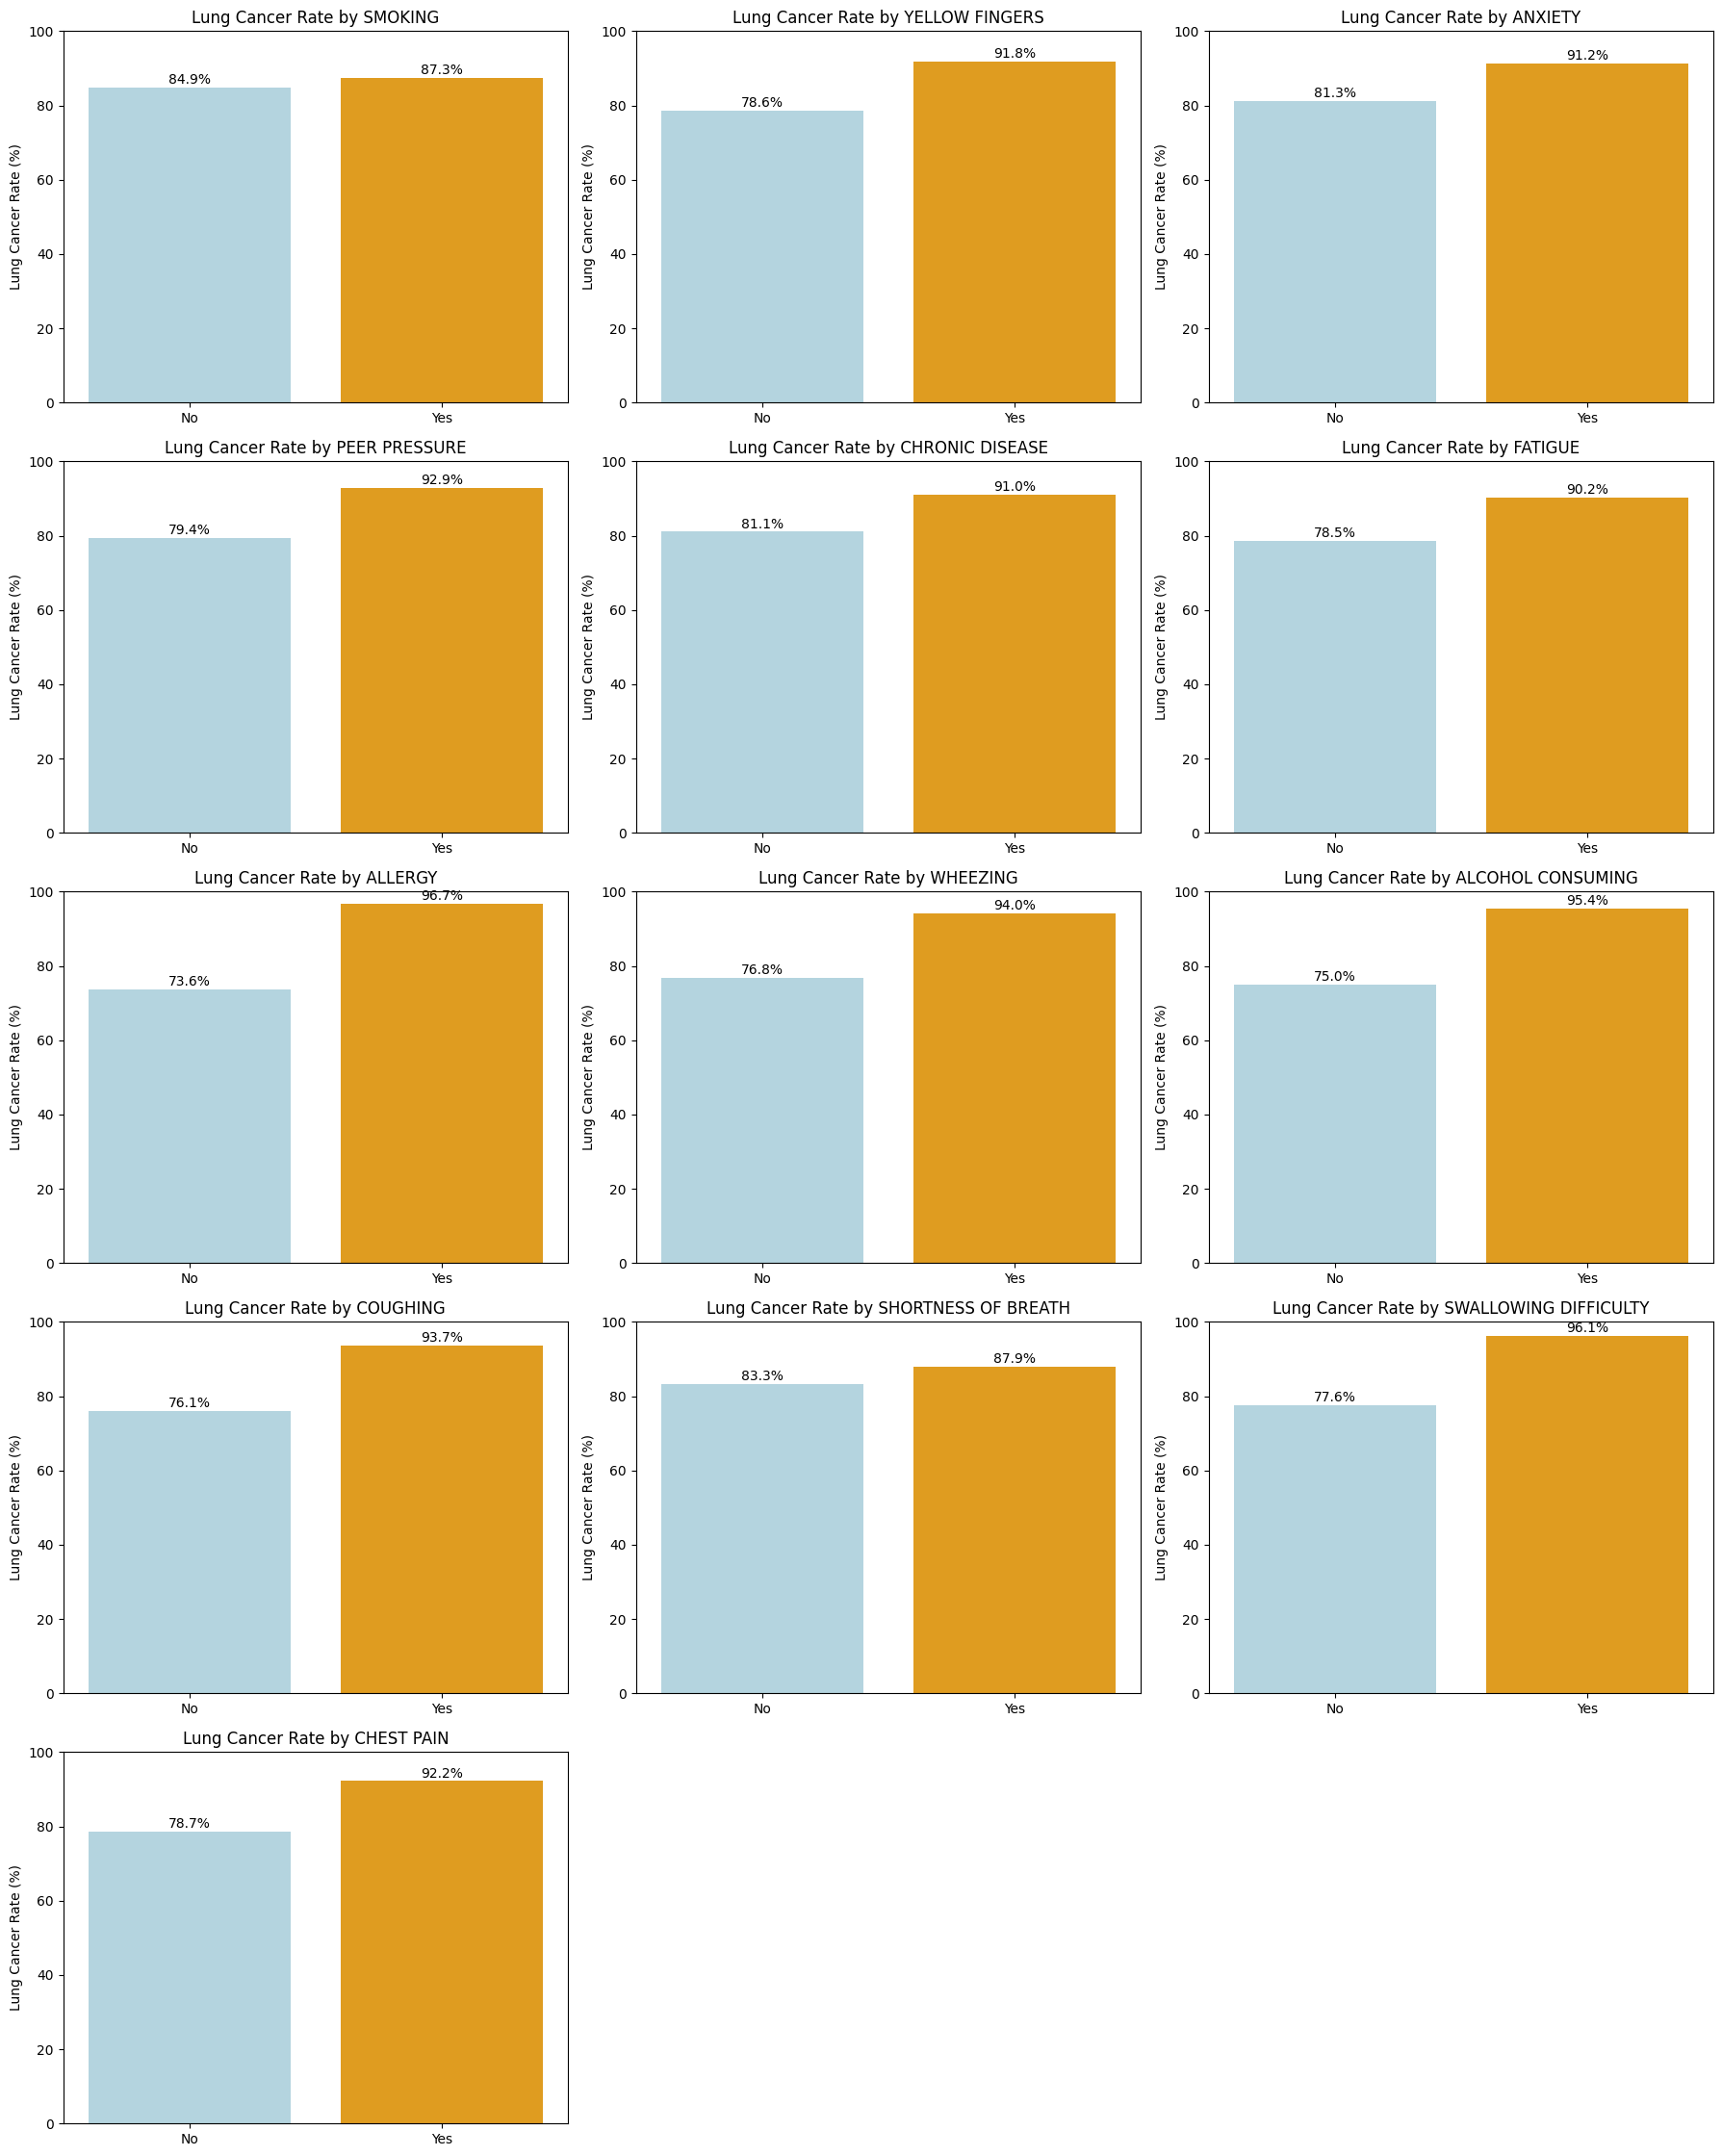

In [31]:
behavioral_and_symptoms_cols = [
    'SMOKING', 'YELLOW FINGERS', 'ANXIETY', 'PEER PRESSURE',
    'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
    'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
    'SWALLOWING DIFFICULTY', 'CHEST PAIN'
]

df_plot = df_cleaned.copy()
df_plot['LUNG CANCER LABEL'] = df_plot['LUNG CANCER'].map({0: 'No', 1: 'Yes'})

for col in behavioral_and_symptoms_cols:
    df_plot[col] = df_plot[col].map({0: 'No', 1: 'Yes'})

# Plot
n_cols = 3
n_rows = -(-len(behavioral_and_symptoms_cols) // n_cols)
plt.figure(figsize=(n_cols * 6, n_rows * 4.5))

for i, col in enumerate(behavioral_and_symptoms_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    group_data = df_plot.groupby(col)['LUNG CANCER'].mean().reset_index()
    group_data['LUNG CANCER'] = group_data['LUNG CANCER'] * 100  # 百分比

    sns.barplot(data=group_data, x=col, y='LUNG CANCER', hue=col, palette={'No': 'lightblue', 'Yes': 'orange'})

    # Percentage Tag
    for index, row in group_data.iterrows():
        plt.text(index, row['LUNG CANCER'] + 1, f"{row['LUNG CANCER']:.1f}%", 
                 ha='center', fontsize=10)

    plt.ylim(0, 100)
    plt.ylabel('Lung Cancer Rate (%)')
    plt.title(f'Lung Cancer Rate by {col}', fontsize=12)
    plt.xlabel('')

plt.tight_layout()
plt.show()


#### Chi-square Test: Lung Cancer vs Behavioral/Symptom Variables

We tested 13 behavioral and symptom variables for their association with lung cancer.

- **Most predictive** (p < 0.001):  
  `ALLERGY`, `ALCOHOL`, and `COUGHING` showed the strongest association .
- **Significant predictors** (p < 0.05):  
  `ALLERGY`, `ALCOHOL CONSUMING`, `COUGHING`, `WHEEZING`, `CHEST PAIN`,  
  `SWALLOWING DIFFICULTY`, `PEER_PRESSURE`, `FATIGUE`, `YELLOW_FINGERS`, etc.
- **Not significant**:  
  Surprisingly, `SMOKING` and `SHORTNESS OF BREATH` were not statistically significant.

> Symptom-related features are stronger predictors than behavioral ones in this dataset.

In [32]:
results = []

for col in behavioral_and_symptoms_cols:
    table = pd.crosstab(df_cleaned[col], df_cleaned['LUNG CANCER'])
    chi2, p, dof, expected = chi2_contingency(table)
    results.append({'Feature': col, 'Chi2': chi2, 'p-value': p})

chi2_df = pd.DataFrame(results).sort_values(by='p-value')
chi2_df

,Feature,Chi2,p-value
6,ALLERGY,28.792970,8.054292e-08
8,ALCOHOL CONSUMING,22.237916,2.408699e-06
11,SWALLOWING DIFFICULTY,18.429018,1.763519e-05
9,COUGHING,16.215510,5.652939e-05
7,WHEEZING,15.698439,7.428546e-05
3,PEER PRESSURE,9.402208,2.167243e-03
12,CHEST PAIN,9.371605,2.203725e-03
1,YELLOW FINGERS,8.799189,3.013645e-03
5,FATIGUE,6.123764,1.333765e-02
2,ANXIETY,4.941539,2.621869e-02


---

## Heatmap

Based on the heatmap below:

> Strongest positive correlations with LUNG CANCER (relatively higher positive correlations and are strong candidates for model inputs)
- ALCOHOL CONSUMING (r = 0.29)
- SWALLOWING DIFFICULTY (r = 0.27)
- FATIGUE (r = 0.25)
- WHEEZING (r = 0.25)
- COUGHING (r = 0.25)
- CHEST PAIN (r = 0.19)

> Watch for multicollinearity (highly correlated with each other)
- ANXIETY & YELLOW FINGERS (r = 0.56)
- ANXIETY & FATIGUE (r = 0.48)

> Weak or negligible correlations with LUNG CANCER (very low correlation (|r| ≈ 0) and may not contribute much)
- AGE (r = 0.11)
- MALE / FEMALE (r = ±0.05)
- SMOKING (r = 0.03) ← Surprisingly low

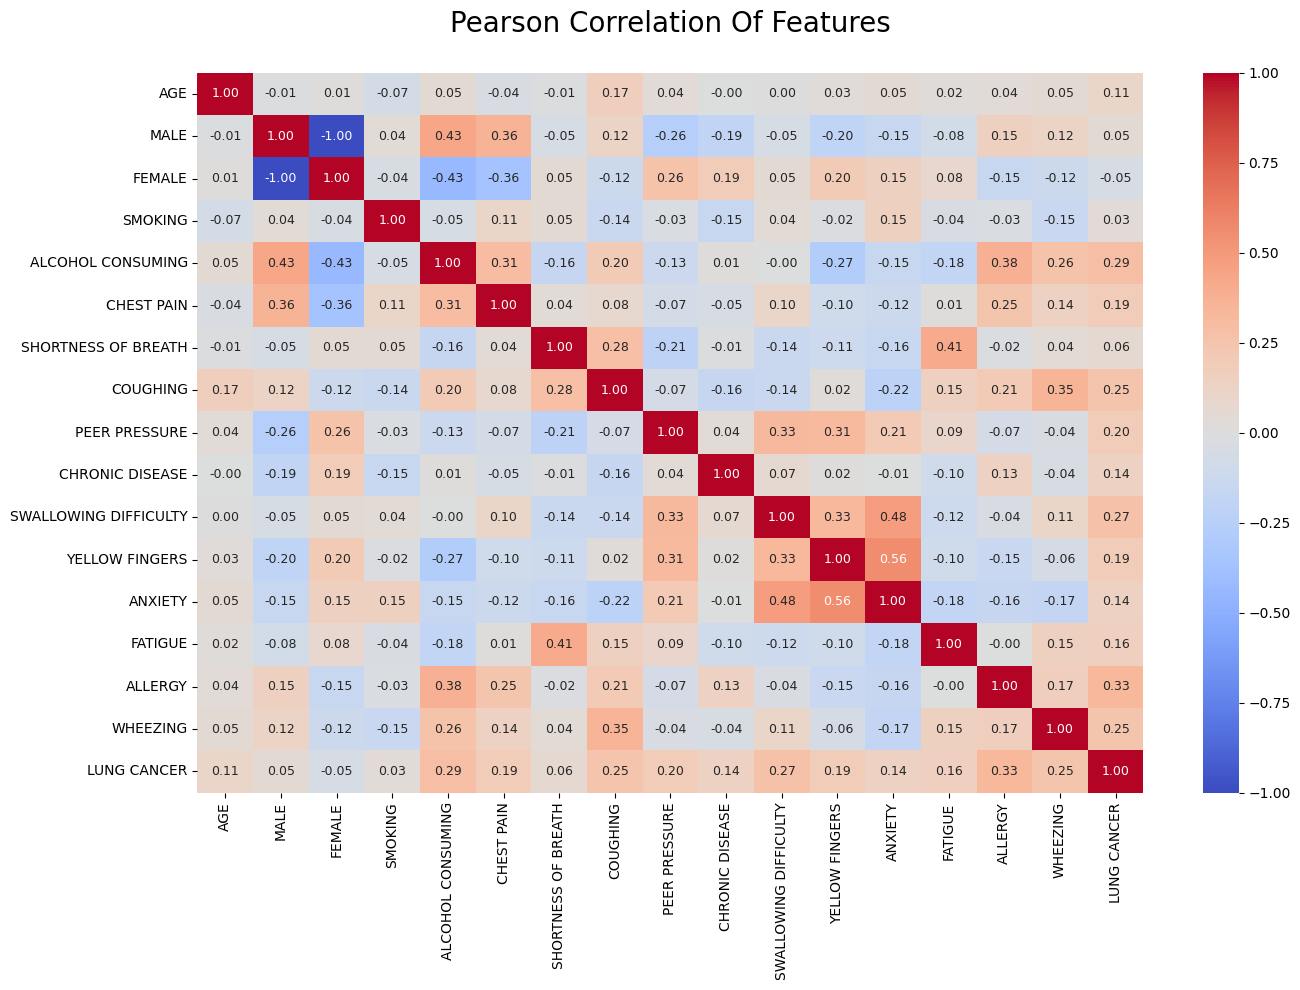

In [ ]:
# Convert 'GENDER' column from Categorical to Numerical using One-Hot Encoding
df_encoded = df_cleaned.copy()
df_encoded['GENDER'] = df_encoded['GENDER'].cat.rename_categories({'M': 'Male', 'F': 'Female'})
df_encoded = pd.get_dummies(df_encoded, columns=['GENDER'])

df_encoded.rename(columns={'GENDER_Male' : 'MALE', 'GENDER_Female' : 'FEMALE'}, inplace=True)
df_encoded = df_encoded[["AGE","MALE","FEMALE","SMOKING","ALCOHOL CONSUMING","CHEST PAIN","SHORTNESS OF BREATH","COUGHING","PEER PRESSURE","CHRONIC DISEASE","SWALLOWING DIFFICULTY","YELLOW FINGERS","ANXIETY","FATIGUE","ALLERGY","WHEEZING","LUNG CANCER"]]

# Heatmap
plt.subplots(figsize=(14, 10))
sns.heatmap(df_encoded.corr(), 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            vmin=-1, vmax=1,
            fmt=".2f",
            annot_kws={"size": 9})
plt.title('Pearson Correlation Of Features\n', fontsize=20)
plt.tight_layout()
plt.show()

---

## Conclusion and Insights

Based on **chi-square test results** and **Pearson correlation analysis**, we selected features that show either statistical significance or meaningful correlation with lung cancer. 

While some variables like **SMOKING** did not pass the chi-square test, they were retained due to moderate correlation and strong domain relevance in medical literature. 

Therefore, our feature selection combines statistical evidence with practical interpretability to ensure robust model performance.

> Selected Feature
- ALCOHOL CONSUMING
- COUGHING
- WHEEZING
- YELLOW FINGERS
- ALLERGY
- FATIGUE
- SWALLOWING DIFFICULTY
- CHEST PAIN
- CHRONIC DISEASE
- SMOKING (domain-relevant)
- AGE (domain-relevant)
- PEER PRESSURE (domain-relevant)